# Unsupervised Learning - Dimensionality Reduction
#### Edmar Junyor Bevilaqua

### PCA - Demo 1

* Use of the PCA algorithm in a simple use case.
* Iris Dataset, very common for examples

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

%matplotlib inline

plt.rcParams['figure.figsize'] = (14, 8)

sns.set(font_scale=2)

## Loading the Iris Dataset

In [3]:
df = pd.read_csv("../Datasets/iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
# In this example, we'll use all the columns
df_train = df[df.columns[:4]]
df_labels = df[df.columns[4]]

df_train.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Applying PCA

In [5]:
pca = PCA()
pca.fit(df_train)

PCA()

### Evaluating Variance

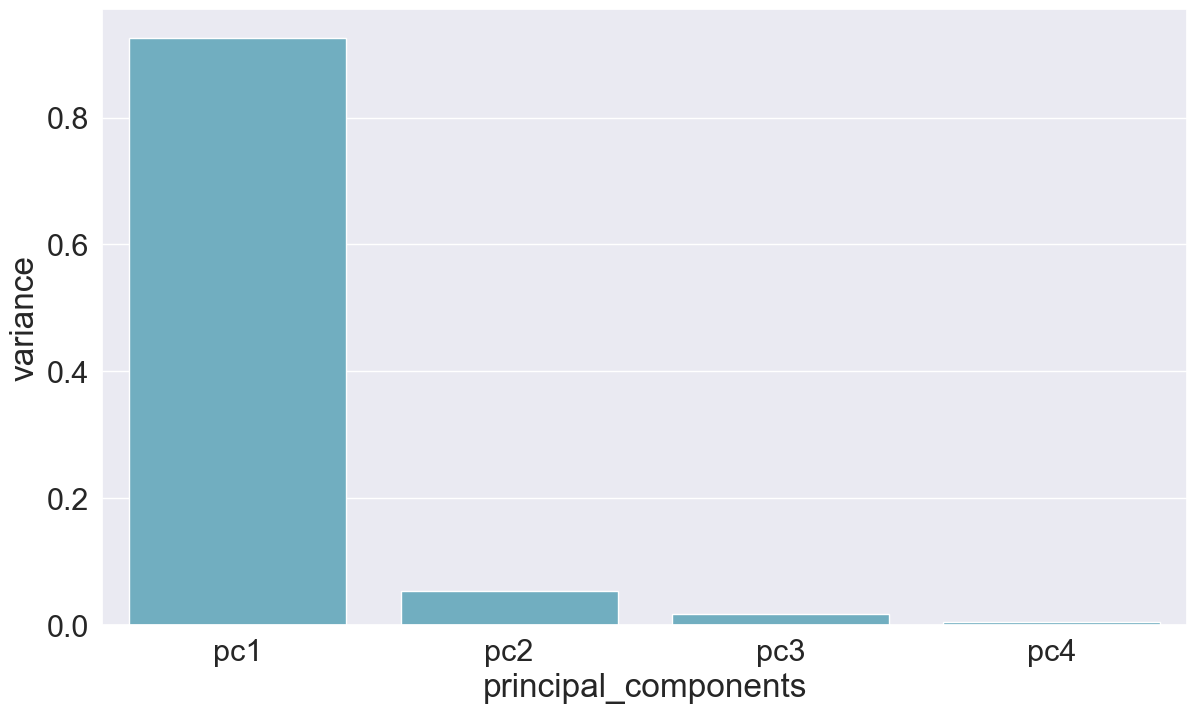

In [9]:
data = {
    'variance': pca.explained_variance_ratio_,
    'principal_components':['pc1','pc2','pc3','pc4']
}

df_variance = pd.DataFrame(data)
_ = sns.barplot(x='principal_components',y='variance', data=df_variance, color='c')

In [14]:
df_train_transformed = pca.fit_transform(df_train)
df_train_transformed = pd.DataFrame(df_train_transformed, columns=['pc1','pc2', 'pc3', 'pc4'])
df_train_transformed.head()

,pc1,pc2,pc3,pc4
0,-2.684207,0.326607,-0.021512,0.001006
1,-2.715391,-0.169557,-0.203521,0.099602
2,-2.889820,-0.137346,0.024709,0.019305
3,-2.746437,-0.311124,0.037672,-0.075955
4,-2.728593,0.333925,0.096230,-0.063129


## Ploting Results

In [17]:
def plot_with_principal_components(dim_x, dim_y, df_train):
    columns_names = df_train.columns
    
    xs = df_train_transformed[df_train_transformed.columns[dim_x]]
    ys = df_train_transformed[df_train_transformed.columns[dim_y]]

    color_dict = {
        'setosa': 'blue',
        'versicolor': 'green',
        'virginica': 'orange'
    }


    for (x, y, l) in zip(xs, ys, df_labels):
        _ = plt.scatter(x, y, alpha=0.8, color=color_dict[l])

    _ = plt.xlabel(columns_names[dim_x])
    _ = plt.ylabel(columns_names[dim_y])

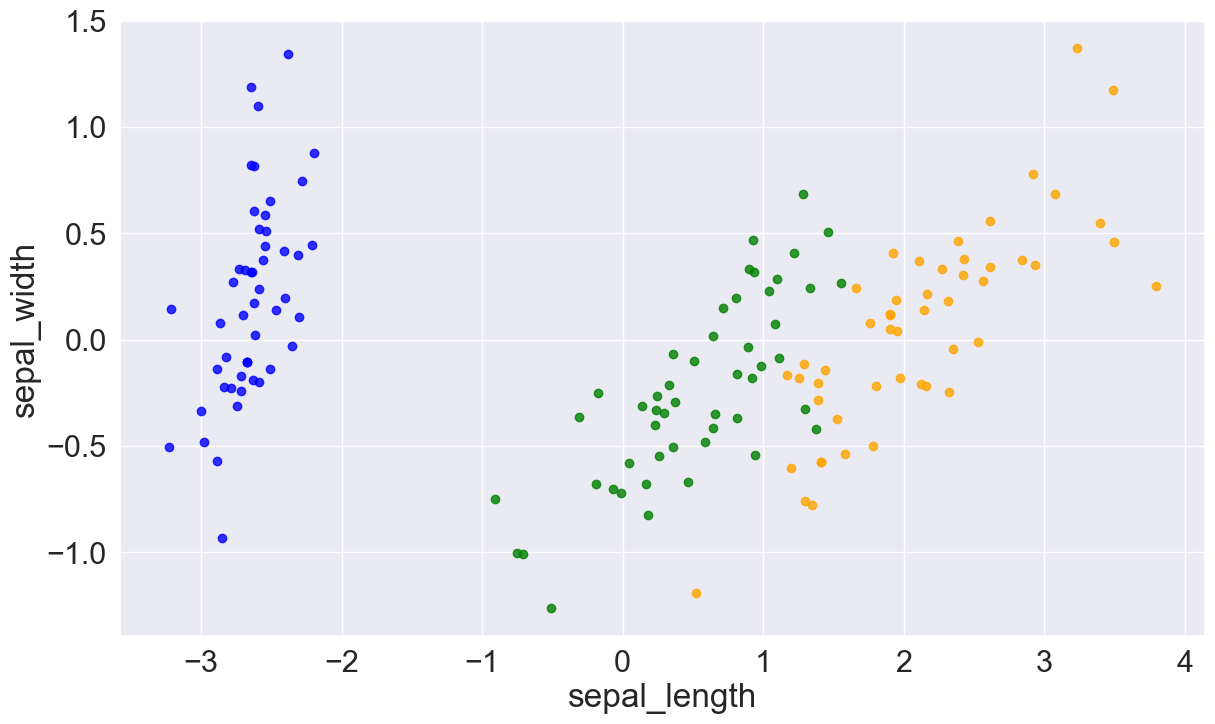

In [25]:
# PC1 x PC2
plot_with_principal_components(0, 1, df_train)

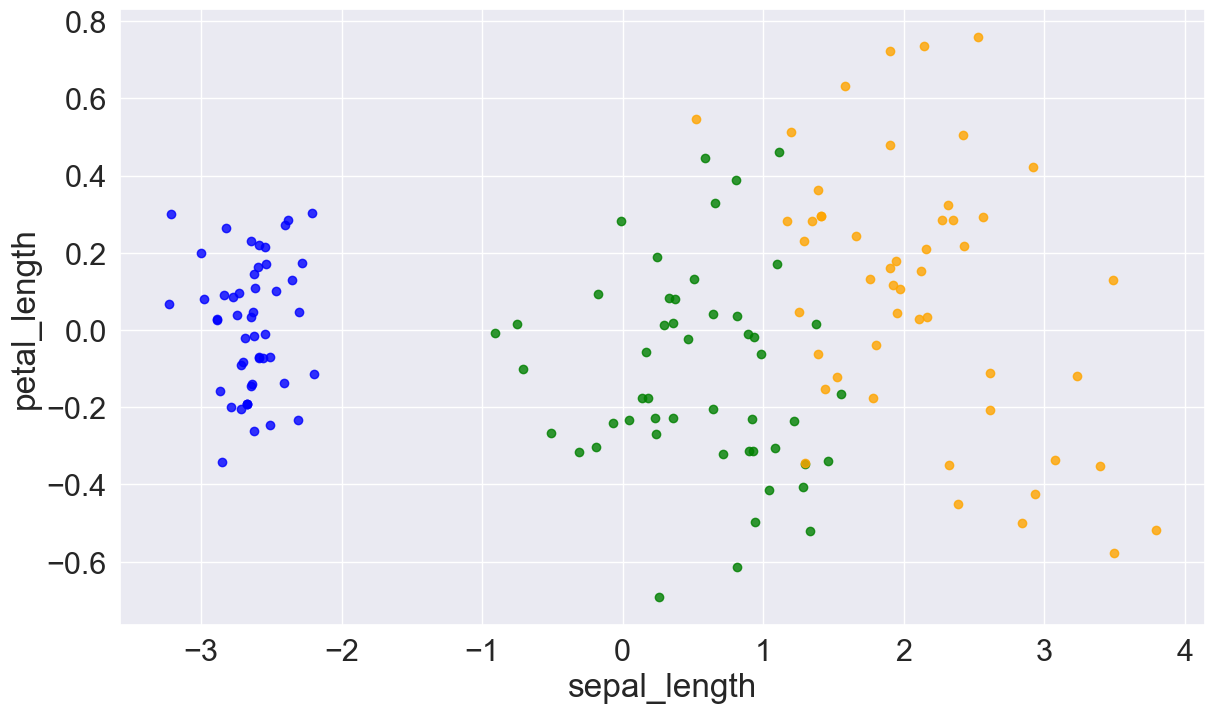

In [22]:
# PC1 x PC3
plot_with_principal_components(0, 2, df_train)

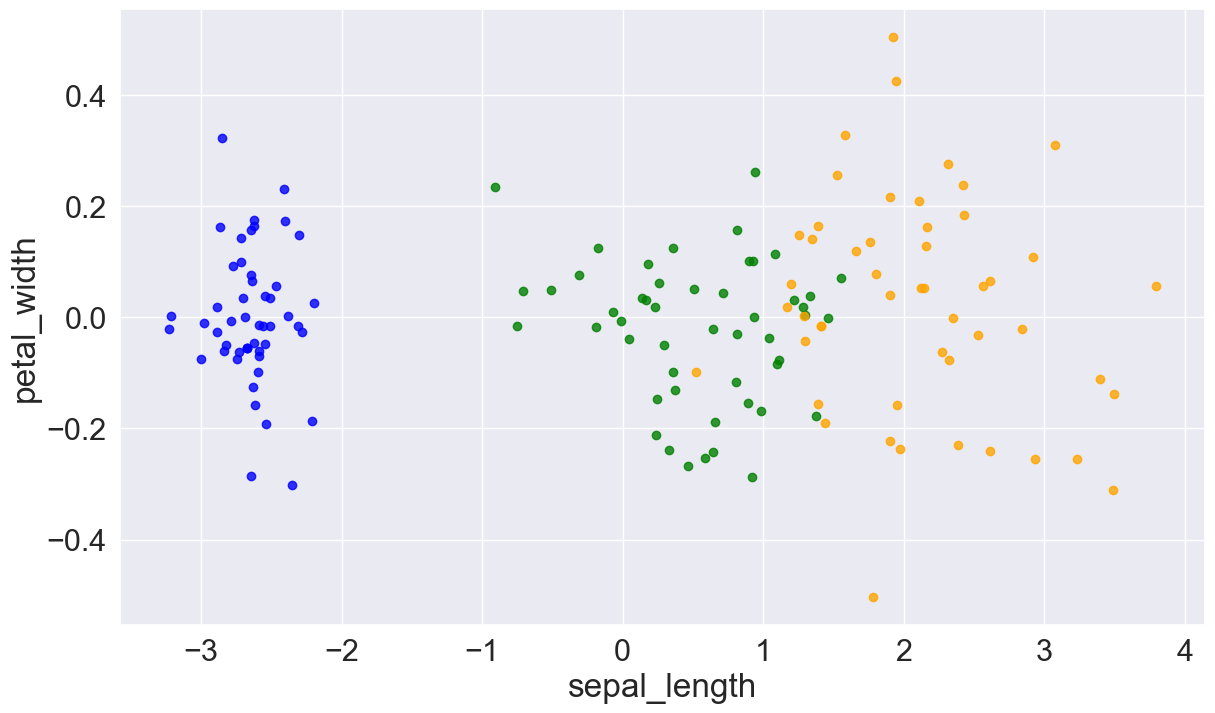

In [23]:
# PC1 x PC4
plot_with_principal_components(0, 3, df_train)

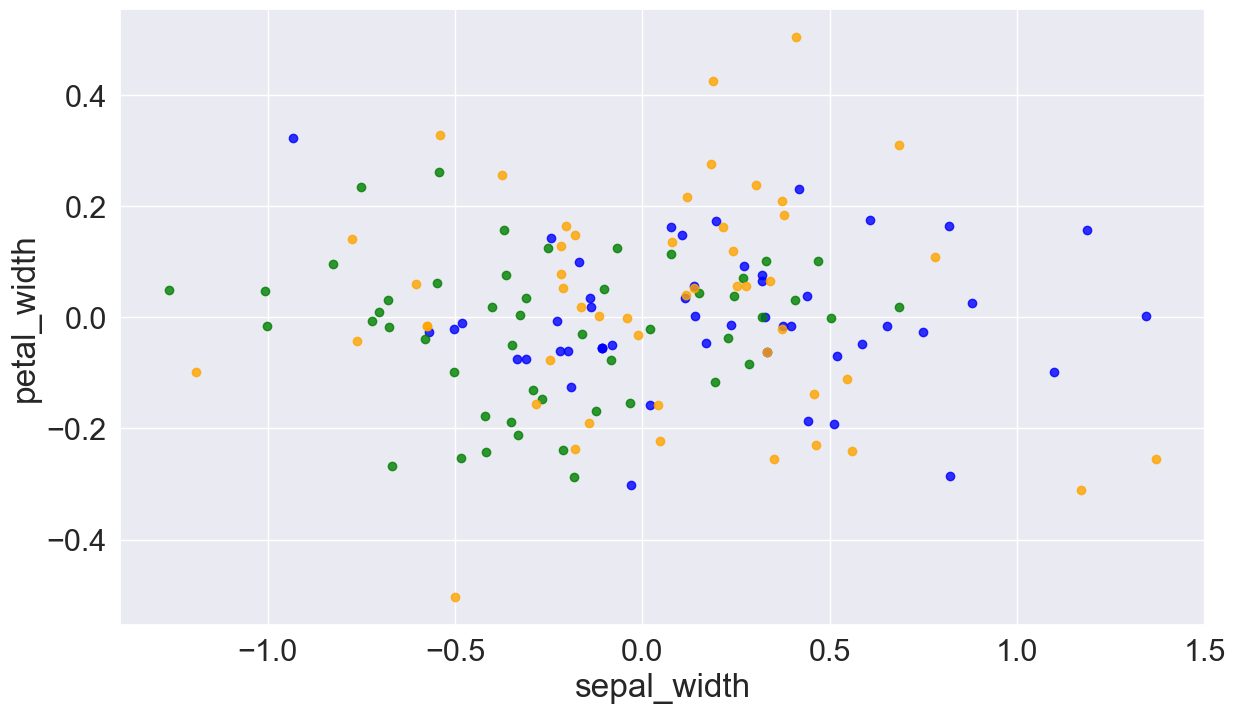

In [24]:
# PC2 x PC3
plot_with_principal_components(1, 3, df_train)

# Conclusion:
---

In this example, it was possible to see that PC1 alone was able to explain around 90% of the variance in our data set, and this high degree of explainability can be seen in the graphs that were plotted. However, when we try to plot combinations using the other principal components (e.g. PC2 x PC3), it is difficult to separate the targets, and this is due to the low explainability of these principal components in relation to variance.